In [39]:
import pandas as pd
import numpy
import pymysql
import matplotlib as mpl
import matplotlib.pyplot as plt
import jieba
import wordcloud
%matplotlib inline

In [16]:
mysql_conn = pymysql.connect(
    host='127.0.0.1',
    port=3306,
    user='root',
    database='music_manage',
)

In [17]:
sql_dy = '''
SELECT dynamic_id, dynamic_plays, dynamic_search, dynamic_down, song_id
FROM music_manage.index_dynamic;
'''
sql_songs = '''
SELECT song_id, song_title, song_artist, song_artist_id, song_album, song_album_id, song_img, song_img_file_path, song_file_path, song_download_url, song_lyrics
FROM music_manage.index_song;
'''
dy_df = pd.read_sql(sql_dy, mysql_conn)
songs_df = pd.read_sql(sql_songs, mysql_conn)


/var/folders/09/t6c1m5r90tbdwz8hzg4nknrc0000gn/T/ipykernel_51101/2403251892.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dy_df = pd.read_sql(sql_dy, mysql_conn)
/var/folders/09/t6c1m5r90tbdwz8hzg4nknrc0000gn/T/ipykernel_51101/2403251892.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  songs_df = pd.read_sql(sql_songs, mysql_conn)


In [18]:
dy_df.head(5)


,dynamic_id,dynamic_plays,dynamic_search,dynamic_down,song_id
0,1,12,0,1,1988861311
1,2,18,0,1,1940187411
2,3,5,0,0,1413374282
3,4,12,0,0,1967082575
4,5,3,0,0,299352


In [19]:
joined_df = dy_df.merge(songs_df,on='song_id',how='inner')
joined_df.head(5)

,dynamic_id,dynamic_plays,dynamic_search,dynamic_down,song_id,song_title,song_artist,song_artist_id,song_album,song_album_id,song_img,song_img_file_path,song_file_path,song_download_url,song_lyrics
0,1,12,0,1,1988861311,借口,许成成,54330671,借口,153087992,http://p2.music.126.net/oE6y51kBOPXyUl3EgQ3pNA...,1988861311.jpeg,1988861311.mp3,http://music.163.com/song/media/outer/url?id=1...,
1,2,18,0,1,1940187411,Better Together,Jeremy Loops,1132592,Better Together,143789993,http://p2.music.126.net/ReyfGwNPMGI2UDVWxwOX8A...,1940187411.jpeg,1940187411.mp3,http://music.163.com/song/media/outer/url?id=1...,
2,3,5,0,0,1413374282,晴れが来る\n晴天来了,春野杉卉,31252052,あなたと吹いた風,84029490,http://p2.music.126.net/WhFprTaP6wZAJ-pFhTyTnw...,1413374282.jpeg,1413374282.mp3,http://music.163.com/song/media/outer/url?id=1...,
3,4,12,0,0,1967082575,下雪了,XMASwu(吴骜),31309410,骜,148680311,http://p1.music.126.net/dVY8mlFzPJMApmPz5lkXcw...,1967082575.jpeg,1967082575.mp3,http://music.163.com/song/media/outer/url?id=1...,
4,5,3,0,0,299352,如风,王菲,9621,Faye Best,29672,http://p1.music.126.net/HBYVyL--ayNYl8q3JJHWBw...,299352.jpeg,299352.mp3,http://music.163.com/song/media/outer/url?id=2...,[00:03]如风 - 王菲 (Faye Wong)\n[00:07]词：林振强\n[00:...


<AxesSubplot:xlabel='song_title'>

/Users/yiyi/opt/miniconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 20511 (\N{CJK UNIFIED IDEOGRAPH-501F}) missing from current font.
  func(*args, **kwargs)
/Users/yiyi/opt/miniconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 21475 (\N{CJK UNIFIED IDEOGRAPH-53E3}) missing from current font.
  func(*args, **kwargs)
/Users/yiyi/opt/miniconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 26228 (\N{CJK UNIFIED IDEOGRAPH-6674}) missing from current font.
  func(*args, **kwargs)
/Users/yiyi/opt/miniconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 12428 (\N{HIRAGANA LETTER RE}) missing from current font.
  func(*args, **kwargs)
/Users/yiyi/opt/miniconda3/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Glyph 12364 (\N{HIRAGANA LETTER GA}) missing from current font.
  func(*args, **kwargs)
/Users/yiyi/opt/miniconda3/lib/python3.9/site-packages/IPytho

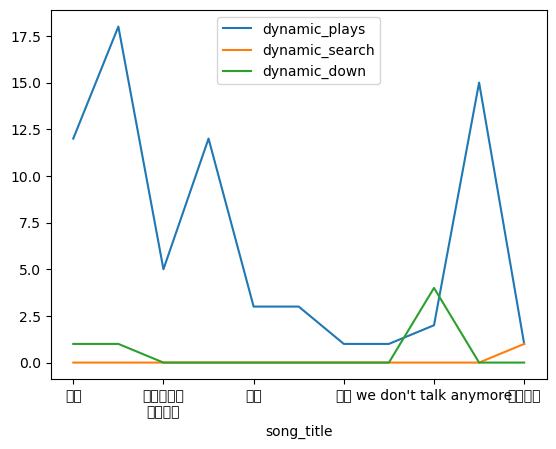

In [26]:
# joined_df.dynamic_plays.plot(color='red')
# joined_df.dynamic_search.plot(color='blue')
# joined_df.dynamic_down.plot(color='yellow')

mpl.rcParams['font.sans-serif'] = ['SimHei']

mpl.rcParams['font.family'] = ['sans-serif']
joined_df.plot(x='song_title',y=['dynamic_plays','dynamic_search','dynamic_down'])

In [31]:
lyrics = joined_df['song_lyrics']
lyrics

0                                                      
1                                                      
2                                                      
3                                                      
4     [00:03]如风 - 王菲 (Faye Wong)\n[00:07]词：林振强\n[00:...
5                                                      
6                                                      
7                                                      
8                                                      
9                                                  暂无歌词
10    [00:03]好久不见 (《失恋33天》电影插曲|《不如不见》国语版) - 陈奕迅 (Eas...
Name: song_lyrics, dtype: object

In [48]:
def filter_lyrics(s):
    import re
#     return re.sub(r'\[\d+\:\d+\]','',s)
    return re.sub(u'[^\u4e00-\u9fa5]','',s)
all_text = ''
for l in lyrics:
#     print(filter_lyrics(l))
    ls = jieba.lcut(filter_lyrics(l.replace('\n','')))
    all_text += " ".join(ls)
all_text


'如风 王菲 词 林振强 曲张 宇 编曲 制作 人 梁荣骏 有 一个 人 曾 让 我 知道 寄生 于 世上 原 是 那么 好 他 的 一双 臂弯 令 我 没 苦恼 他 使 我 自豪 我 跟 那 人 曾 互勉 倾诉 也 跟 他 笑 望 长夜 变 清早 可惜 他 必须 要 走 剩 我 共 身影 长 夜里 拥抱 来 又 如风离 又 如风 或 世事 通通 不过 是 场梦人 在 途中 人 在 时空 相识 也许 不过 擦 过 梦 中来 又 如风离 又 如风 或 我 亦 不应 再 这般 心痛 但 我 不过 是 人 非梦 总 有些 真笑 亦 有 真痛 来 又 如风离 又 如风 或 世事 通通 不过 是 场梦人 在 途中 人 在 时空 相识 也许 不过 擦 过 梦 中来 又 如风离 又 如风 或 我 亦 不应 再 这般 心痛 但 我 不过 是 人 非梦 总 有些 真笑 亦 有 真痛 有 一个 人 曾 让 我 知道 寄生 于 世上 原 是 那么 好 可惜 他 必须 要 走 剩 我 共 身影 长 夜里 拥抱 来 又 如风离 又 如风 或 世事 通通 不过 是 场梦人 在 途中 人 在 时空 相识 也许 不过 擦 过 梦 中来 又 如风 去 亦 匆匆 或 我 亦 不应 再 这般 心痛 但 我 不过 是 人 非梦 总 有些 真笑 亦 有 真痛 让 我 心痛 独迎 空洞暂无 歌词好久不见 失恋 天 电影 插曲 不如 不见 国语版 陈奕迅 词施 立曲 陈小霞 编曲 孙伟明 陈珀 我 来到 你 的 城市 走过 你 来时 的 路 想象 着 没 我 的 日子 你 是 怎样 的 孤独 拿 着 你 给 的 照片 熟悉 的 那 一条街 只是 没 了 你 的 画面 我们 回 不到 那天 你 会 不会 忽然 的 出现 在 街角 的 咖啡店 我会 带 着 笑脸 挥手 寒暄 和 你 坐 着 聊聊天 我 多么 想 和 你 见 一面 看看 你 最近 改变 不再 去 说 从前 只是 寒暄 对 你 说 一句 只是 说 一句 好久不见 拿 着 你 给 的 照片 熟悉 的 那 一条街 只是 没 了 你 的 画面 我们 回 不到 那天 你 会 不会 忽然 的 出现 在 街角 的 咖啡店 我会 带 着 笑脸 挥手 寒暄 和 你 坐 着 聊聊天 我 多么 想 和 你 见 一面 看看 你 最近 改变 不再 去 说 从前 只是 寒暄 对

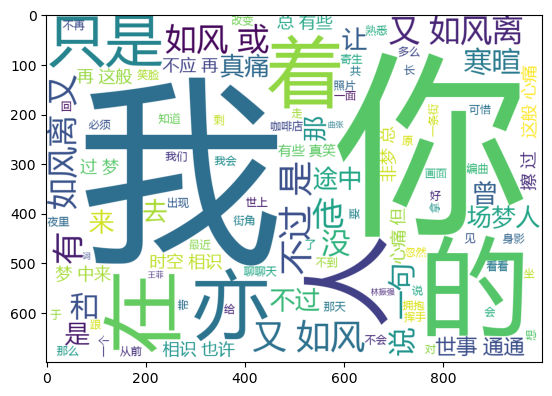

In [59]:
wc = wordcloud.WordCloud(font_path=r"/Users/yiyi/PycharmProjects/music-website-manage/msyh.ttf",
                         width = 1000,
                         height = 700,
                         background_color='white',
                         max_words=100)
# msyh.ttc电脑本地字体，写可以写成绝对路径
wc.generate(all_text) # 加载词云文本
plt.imshow(wc)
# wc.to_file("ciyun.png") # 保存词云文件